In [2]:
import pandas as pd

In [7]:
df = pd.read_csv('train.csv')

In [8]:
df.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [9]:
col = df.columns
col

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('train.csv')

# Selecting relevant features for training
features = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
X = data[features]
y = data['trip_duration']

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the linear regression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_scaled, y)

# Print coefficients and intercept
print("Coefficients:", linear_reg_model.coef_)
print("Intercept:", linear_reg_model.intercept_)


Coefficients: [ 101.45268943   14.00512846  181.31979922 -121.89951872  -43.7071961
  -61.19490416]
Intercept: 959.4922729603752


In [13]:
coefficient_matrix = linear_reg_model.coef_

print("Coefficient Matrix:")
print(coefficient_matrix)

Coefficient Matrix:
[ 101.45268943   14.00512846  181.31979922 -121.89951872  -43.7071961
  -61.19490416]


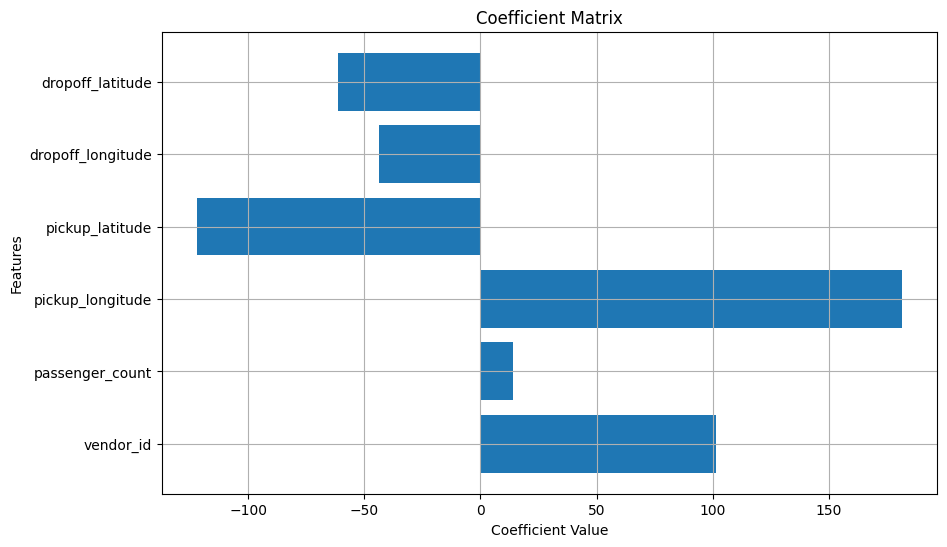

In [14]:
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv')

# Selecting relevant features for training
features = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
X = data[features]
y = data['trip_duration']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


linear_reg_model = LinearRegression()


linear_reg_model.fit(X_scaled, y)


coefficient_matrix = linear_reg_model.coef_

feature_names = features


plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficient_matrix)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Coefficient Matrix')
plt.grid(True)
plt.show()

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('train.csv')

# Selecting relevant features for training (excluding 'vendor_id' and 'passenger_count')
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
X = data[features]
y = data['trip_duration']

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the linear regression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_scaled, y)

# Coefficient matrix
coefficient_matrix = linear_reg_model.coef_

print("Coefficient Matrix (excluding 'vendor_id' and 'passenger_count'):")
print(coefficient_matrix)

Coefficient Matrix (excluding 'vendor_id' and 'passenger_count'):
[ 183.15090752 -121.87432258  -45.04314944  -60.80653681]


In [16]:
test_data = pd.read_csv('test.csv')

In [17]:
test_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
X_test = test_data[test_features]

In [18]:
X_test_scaled = scaler.transform(X_test)

In [19]:
predictions = linear_reg_model.predict(X_test_scaled)

In [20]:
test_data['trip_duration_predicted'] = predictions

In [21]:
result_df = test_data[['id', 'trip_duration_predicted']]

# Write the results to a new CSV file
result_df.to_csv('predictions.csv', index=False)

In [24]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the training dataset
train_data = pd.read_csv('train.csv')

# Select relevant features for training (excluding 'vendor_id' and 'passenger_count')
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
X_train = train_data[features]
y_train = train_data['trip_duration']

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train the linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the training data
train_predictions = linear_reg_model.predict(X_train_scaled)

# Calculate RMSE using training predictions and actual durations
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))

print("Root Mean Squared Error (RMSE) on Training Data:", train_rmse)


Root Mean Squared Error (RMSE) on Training Data: 5232.919672402924


In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the test dataset
test_data = pd.read_csv('test.csv')

# Select relevant features for testing (excluding 'vendor_id' and 'passenger_count')
test_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

# Extract the test features
X_test = test_data[test_features]

# Standardize test features
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Use the trained linear regression model to make predictions
predicted_durations = linear_reg_model.predict(X_test_scaled)

# Add the predicted durations as a new column in the test dataset
test_data['predicted_trip_duration'] = predicted_durations

# Save the updated test dataset to a new CSV file
test_data.to_csv('test_with_predictions.csv', index=False)

print("Predicted trip durations added to test_with_predictions.csv")


Predicted trip durations added to test_with_predictions.csv


In [33]:
test_data1.reset_index(drop=True, inplace=True)
test_data2.reset_index(drop=True, inplace=True)
